In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd
pd.options.display.max_rows = 999

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "PCA"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "Images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Getting The Data

Combined2.0.xlsx has all of the non-missing Employee data correctly stored as float64.

In [2]:
data = pd.read_excel('~/Documents/GitHub/COMPS/Clean Data/Combined2.0.xlsx', header=0)
data.head()

,D-U-N-S@ Number,Company Name,URL,Founding,EIN,Country,State,SIC,Employees,Year3 Total Assets,...,Year1 Quick Ratio,Year3 Current Ratio,Year2 Current Ratio,Year1 Current Ratio,Year3 Net Current Assets as % of Total Assets,Year2 Net Current Assets as % of Total Assets,Year1 Net Current Assets as % of Total Assets,Year3 Revenue to Assets,Year2 Revenue to Assets,Year1 Revenue to Assets
0,61-164-6980,"024 PHARMA, INC.",WWW. 24PHARMA.COM,2004.0,201862731.0,USA,FLORIDA,2023,2.0,839829.0,...,NaN,9.86,1.62,NaN,0.8523,0.3576,0.0000,1.29,24.50,NaN
1,92-697-3645,"1-800 CONTACTS, INC.",WWW.18 CONTACTS.COM,1997.0,870571643.0,USA,UTAH,3851,3851991.0,108985000.0,...,0.29,1.42,1.30,1.35,0.0914,0.0672,0.0952,1.94,2.07,2.47
2,80-899-8355,"1-800-FLOWERS.COM, INC.",WWW.18 FLOWERS.COM,1976.0,113117311.0,USA,NEW YORK,5961,4633.0,552470000.0,...,1.39,2.06,2.19,2.38,0.2393,0.2596,0.2898,2.16,2.02,2.06
3,07-926-5549,"1347 PROPERTY INSURANCE HOLDINGS, INC.",,2012.0,NaN,USA,FLORIDA,6331,27.0,90849000.0,...,NaN,NaN,NaN,NaN,0.0000,0.0000,0.0000,0.36,0.33,0.39
4,17-511-5658,180 DEGREE CAPITAL CORP,WWW.18 DEGREECAPITAL.COM,1981.0,133119827.0,USA,NEW JERSEY,6799,8.0,74622068.0,...,0.47,7.50,1.51,4.52,0.1868,0.0180,0.0822,0.02,0.01,0.01


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9987 entries, 0 to 9986
Columns: 109 entries, D-U-N-S@ Number to Year1 Revenue to Assets
dtypes: float64(103), int64(1), object(5)
memory usage: 8.3+ MB


In [4]:
data.isnull().sum()

D-U-N-S@ Number                                        0
Company Name                                           0
URL                                                    0
Founding                                             332
EIN                                                 2813
Country                                                0
State                                                  0
SIC                                                    0
Employees                                            207
Year3 Total Assets                                   559
Year2 Total Assets                                   203
Year1 Total Assets                                    74
AVGTA                                                 33
Year3 Current Assets                                1994
Year2 Current Assets                                1700
Year1 Current Assets                                1587
AVGCA                                               1526
Year3 Total Liabilities        

# Clean and Preprocess the Data 

In [5]:
data = data.fillna(0)
data.isna().sum()

D-U-N-S@ Number                                     0
Company Name                                        0
URL                                                 0
Founding                                            0
EIN                                                 0
Country                                             0
State                                               0
SIC                                                 0
Employees                                           0
Year3 Total Assets                                  0
Year2 Total Assets                                  0
Year1 Total Assets                                  0
AVGTA                                               0
Year3 Current Assets                                0
Year2 Current Assets                                0
Year1 Current Assets                                0
AVGCA                                               0
Year3 Total Liabilities                             0
Year2 Total Liabilities     

In [6]:
data = data.dropna(0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9987 entries, 0 to 9986
Columns: 109 entries, D-U-N-S@ Number to Year1 Revenue to Assets
dtypes: float64(103), int64(1), object(5)
memory usage: 8.4+ MB


In [7]:
data.dtypes

D-U-N-S@ Number                                      object
Company Name                                         object
URL                                                  object
Founding                                            float64
EIN                                                 float64
Country                                              object
State                                                object
SIC                                                   int64
Employees                                           float64
Year3 Total Assets                                  float64
Year2 Total Assets                                  float64
Year1 Total Assets                                  float64
AVGTA                                               float64
Year3 Current Assets                                float64
Year2 Current Assets                                float64
Year1 Current Assets                                float64
AVGCA                                   

In [8]:
data.Country.astype("category")
data.State.astype("category")

0            FLORIDA
1               UTAH
2           NEW YORK
3            FLORIDA
4         NEW JERSEY
            ...     
9982    PENNSYLVANIA
9983      WASHINGTON
9984    PENNSYLVANIA
9985        COLORADO
9986      CALIFORNIA
Name: State, Length: 9987, dtype: category
Categories (53, object): [ALABAMA, ALASKA, ARIZONA, ARKANSAS, ..., WASHINGTON, WEST VIRGINIA, WISCONSIN, WYOMING]

# Training and Visualizing 

In [9]:
# Set X to all of the float64 features
X = data.drop(['D-U-N-S@ Number', 'Company Name', 'URL', 'Country', 'State'], axis=1).copy()
X.head()

,Founding,EIN,SIC,Employees,Year3 Total Assets,Year2 Total Assets,Year1 Total Assets,AVGTA,Year3 Current Assets,Year2 Current Assets,...,Year1 Quick Ratio,Year3 Current Ratio,Year2 Current Ratio,Year1 Current Ratio,Year3 Net Current Assets as % of Total Assets,Year2 Net Current Assets as % of Total Assets,Year1 Net Current Assets as % of Total Assets,Year3 Revenue to Assets,Year2 Revenue to Assets,Year1 Revenue to Assets
0,2004.0,201862731.0,2023,2.0,839829.0,18387.9,-3940.0,2.847590e+05,796548.0,17154.4,...,0.00,9.86,1.62,0.00,0.8523,0.3576,0.0000,1.29,24.50,0.00
1,1997.0,870571643.0,3851,3851991.0,108985000.0,114945000.0,100525000.0,1.081517e+08,33761000.0,33544000.0,...,0.29,1.42,1.30,1.35,0.0914,0.0672,0.0952,1.94,2.07,2.47
2,1976.0,113117311.0,5961,4633.0,552470000.0,570889000.0,606440000.0,5.765997e+08,257402000.0,273021000.0,...,1.39,2.06,2.19,2.38,0.2393,0.2596,0.2898,2.16,2.02,2.06
3,2012.0,0.0,6331,27.0,90849000.0,114437000.0,147923000.0,1.177363e+08,0.0,0.0,...,0.00,0.00,0.00,0.00,0.0000,0.0000,0.0000,0.36,0.33,0.39
4,1981.0,133119827.0,6799,8.0,74622068.0,84127746.0,84053054.0,8.093429e+07,16085534.0,4499938.0,...,0.47,7.50,1.51,4.52,0.1868,0.0180,0.0822,0.02,0.01,0.01


In [10]:
from sklearn.decomposition import PCA
# Start with dimensionality reduction to 10 components.
pca10 = PCA(n_components = 10)
X10D = pca10.fit_transform(X)

The `PCA` object gives access to the principal components that it computed:

In [11]:
pca10.components_

array([[ 5.67767623e-13, -9.97533683e-06,  2.25540012e-10, ...,
        -5.73903276e-13, -2.75397334e-12, -4.43960577e-13],
       [-1.51242820e-12, -1.32308213e-05, -6.53568058e-11, ...,
         8.43262931e-13,  4.03427182e-12,  6.51599388e-13],
       [ 6.87241569e-11,  4.75610193e-04, -2.17267453e-09, ...,
        -4.00110983e-12, -3.84606274e-11, -1.76273042e-12],
       ...,
       [-5.45986768e-10, -6.31819360e-04,  2.04964620e-10, ...,
         5.03887342e-12,  2.57939811e-11,  3.34927496e-12],
       [-2.55685293e-10, -9.53764515e-04,  9.17721213e-09, ...,
        -1.83299500e-11, -5.53582042e-11, -1.56083316e-11],
       [ 4.02543274e-10,  7.98804497e-04, -4.99716560e-09, ...,
        -1.38152312e-12, -8.28220527e-12,  4.14320292e-13]])

Now let's look at the explained variance ratio:

In [12]:
(pca10.explained_variance_ratio_ * 100).round(1)

array([86.9, 11. ,  1.4,  0.2,  0.2,  0.1,  0.1,  0.1,  0. ,  0. ])

The first dimension explains 86.9% of the variance, while the second explains 11.0%. Let's try less components!

In [13]:
(1 - pca10.explained_variance_ratio_.sum()) * 100

0.07265069115891531

By projecting down to 10D, we lost about 0.073% of the variance:

In [14]:
# Reduce down to 5 components
pca5 = PCA(n_components = 5)
X5D = pca5.fit_transform(X)

In [15]:
pca5.components_

array([[ 5.67768046e-13, -9.97533683e-06,  2.25540012e-10,
        -5.04793219e-08,  3.29275714e-01,  3.31334700e-01,
         3.35675366e-01,  3.32201788e-01,  1.67350433e-01,
         1.64316240e-01,  1.63770661e-01,  1.65157494e-01,
         3.15595692e-01,  3.17518607e-01,  3.21480027e-01,
         3.18277425e-01,  4.73601294e-02,  5.06051831e-02,
         5.44679923e-02,  5.08178675e-02,  9.18177226e-02,
         8.76772390e-02,  8.90051449e-02,  8.95110015e-02,
         1.55023483e-02,  1.62753903e-02,  1.74282944e-02,
         1.64145523e-02,  3.58879437e-03,  8.74084365e-04,
         9.01662694e-04,  1.78960798e-03,  4.21063679e-03,
         3.93418839e-03,  3.48793093e-03,  3.87831627e-03,
         8.27915683e-04,  1.21762071e-03,  1.76598521e-03,
         1.27097435e-03,  1.77732452e-03,  1.17447601e-03,
         1.99003701e-03,  1.65593538e-03,  1.12339049e-03,
         2.14672105e-03, -1.24277300e-03,  6.69639032e-04,
        -2.77987084e-03, -3.11734488e-03, -2.16998606e-0

In [16]:
(pca5.explained_variance_ratio_ * 100).round(1)

array([86.9, 11. ,  1.4,  0.2,  0.2])

In [17]:
(1 - pca10.explained_variance_ratio_.sum()) * 100

0.07265069115891531

By projecting down to 5D, we lost the same 0.073% of the variance:

Let's visualize the explained variance for all components.

In [18]:
pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [19]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [20]:
d

2

The first 2 components account for more than 95% of variance.

Saving figure explained_variance_plot


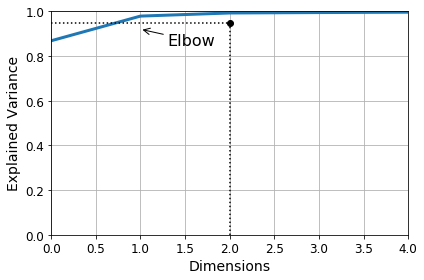

In [21]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 4, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(1, 0.92), xytext=(1.3, 0.85),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
save_fig("explained_variance_plot")
plt.show()